In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('laptops_10.csv', sep = ',', encoding = 'latin-1')
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


Text(0.5, 1.0, 'Количество памяти')

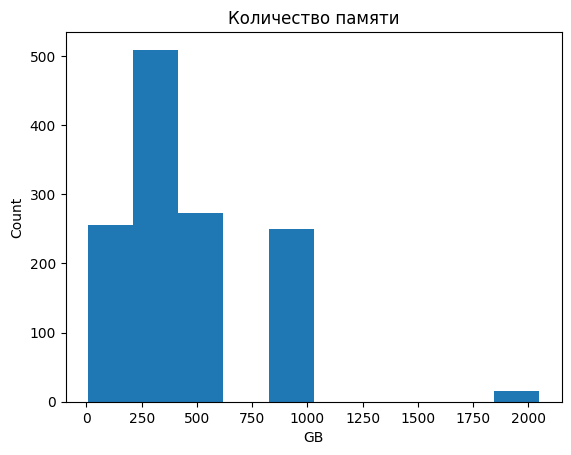

In [7]:
plt.hist(df['Memory_Amount'])
plt.xlabel('GB')
plt.ylabel('Count')
plt.title('Количество памяти')

Text(0.5, 1.0, 'Стоимость')

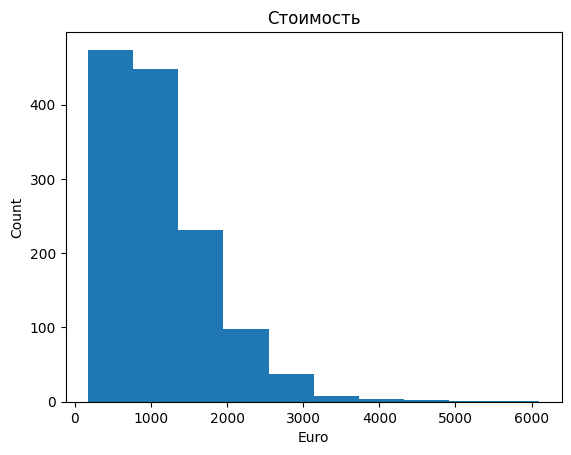

In [8]:
plt.hist(df['Price_euros'])
plt.xlabel('Euro')
plt.ylabel('Count')
plt.title('Стоимость')

Text(0.5, 1.0, 'Weight')

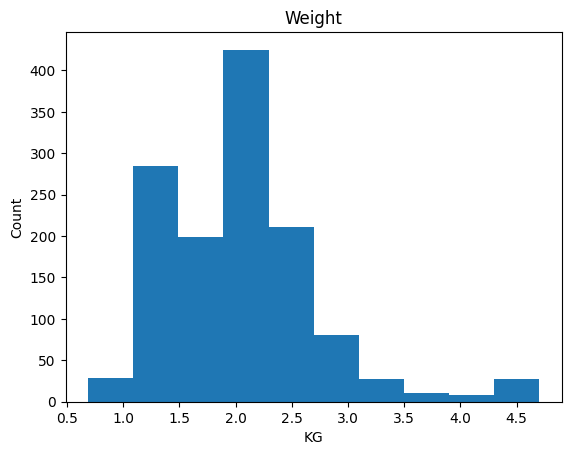

In [9]:
plt.hist(df['Weight'])
plt.xlabel('KG')
plt.ylabel('Count')
plt.title('Weight')

In [10]:
data = df['Memory_Type'].value_counts()
data

# plt.hist(df['Weight'])
# plt.xlabel('KG')
# plt.ylabel('Count')
# plt.title('Weight')

SSD             641
HDD             576
FlashStorage     74
Hybrid           12
Name: Memory_Type, dtype: int64

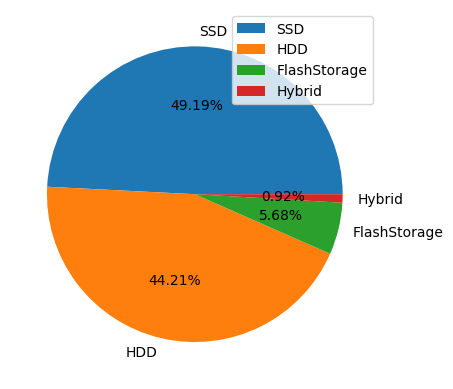

In [11]:
plt.pie(data.values, labels = data.index, autopct = '%1.2f%%')
plt.legend(data.index);

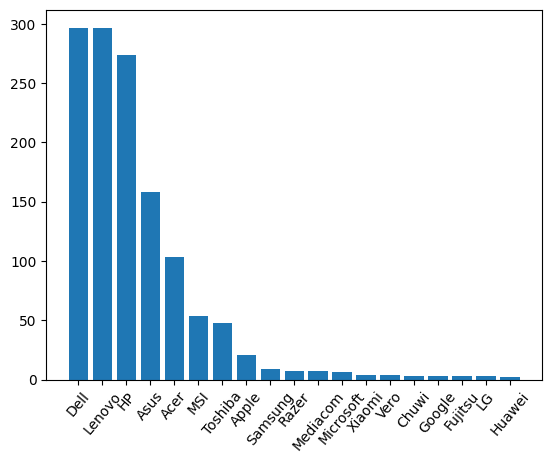

In [12]:
data_company = df['Company'].value_counts()

plt.bar(data_company.index, data_company.values)
plt.xticks(rotation = 50);

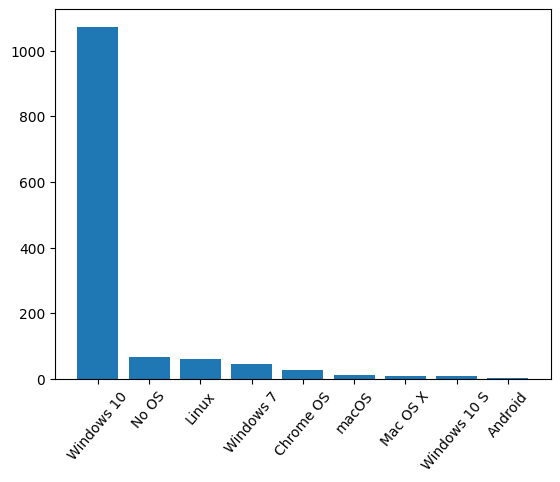

In [13]:
data_OS = df['OpSys'].value_counts()

plt.bar(data_OS.index, data_OS.values)
plt.xticks(rotation = 50);

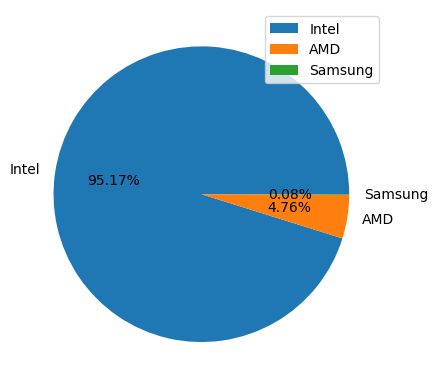

In [14]:
data = df['Cpu_Company'].value_counts()
plt.pie(data.values, labels = data.index, autopct = '%1.2f%%')
plt.legend(data.index);

In [15]:
data = pd.crosstab(index = df['Company'], columns = df['Cpu_Company'])
data = data.drop(columns = 'Samsung').reset_index()
data

Cpu_Company,Company,AMD,Intel
0,Acer,10,93
1,Apple,0,21
2,Asus,11,147
3,Chuwi,0,3
4,Dell,0,297
5,Fujitsu,0,3
6,Google,0,3
7,HP,25,249
8,Huawei,0,2
9,LG,0,3


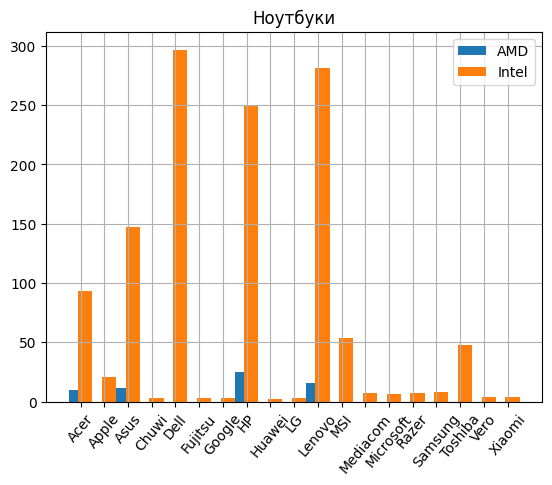

In [16]:
import numpy as np

n_ticks = np.arange(len(data))

plt.bar(n_ticks - 0.2, data['AMD'], width = 0.6)
plt.bar(n_ticks + 0.2, data['Intel'], width = 0.6)
plt.legend(['AMD', 'Intel'])
plt.title('Ноутбуки')
plt.grid()
plt.xticks(n_ticks, data['Company'], rotation = 50);

In [17]:
data = pd.crosstab(index = df['Company'], columns = df['Cpu_Company'], normalize = 'index')
data = data.drop(columns = 'Samsung').reset_index()
data

Cpu_Company,Company,AMD,Intel
0,Acer,0.097087,0.902913
1,Apple,0.000000,1.000000
2,Asus,0.069620,0.930380
3,Chuwi,0.000000,1.000000
4,Dell,0.000000,1.000000
5,Fujitsu,0.000000,1.000000
6,Google,0.000000,1.000000
7,HP,0.091241,0.908759
8,Huawei,0.000000,1.000000
9,LG,0.000000,1.000000


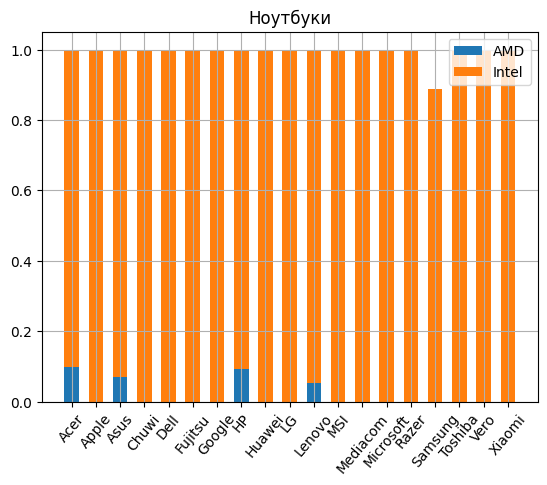

In [18]:
import numpy as np

plt.bar(data['Company'], data['AMD'], width = 0.6)
plt.bar(data['Company'], data['Intel'], width = 0.6, bottom = data['AMD'])
plt.legend(['AMD', 'Intel'])
plt.title('Ноутбуки')
plt.grid()
plt.xticks(data['Company'], rotation = 50);

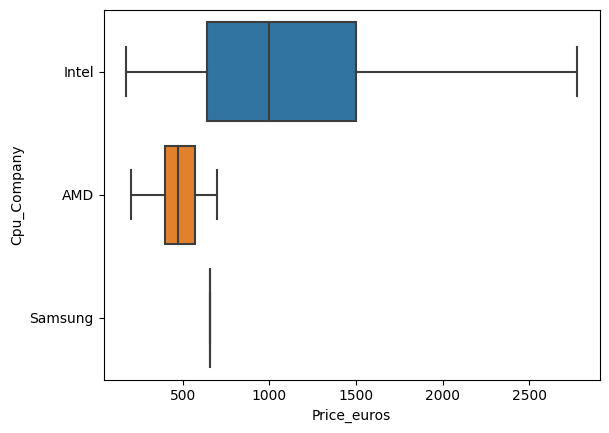

In [19]:
import seaborn as sns

sns.boxplot(x = df['Price_euros'], y = df['Cpu_Company'], showfliers = False);

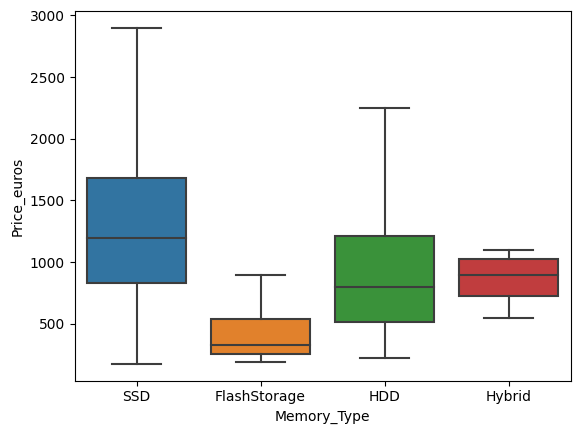

In [20]:
sns.boxplot(y = df['Price_euros'], x = df['Memory_Type'], showfliers = False);

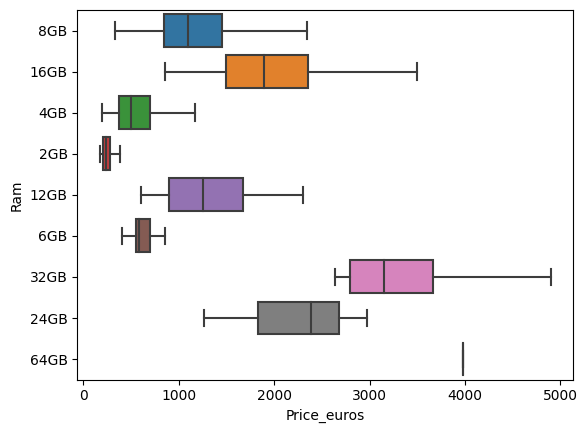

In [21]:
sns.boxplot(x = df['Price_euros'], y = df['Ram'], showfliers = False);

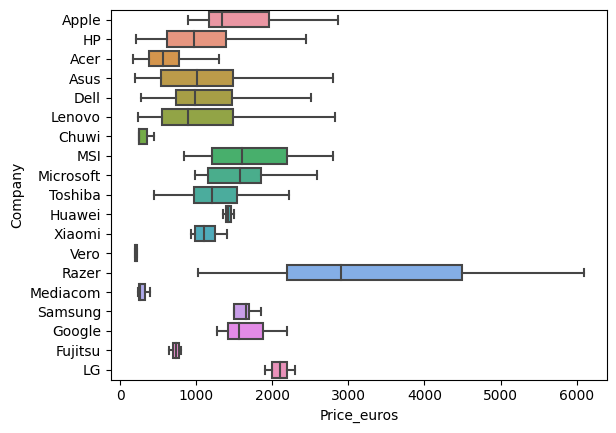

In [22]:
sns.boxplot(x = df['Price_euros'], y = df['Company'], showfliers = False);

In [23]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix

C:\Users\asukh\AppData\Local\Temp\ipykernel_12172\1394145022.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,Inches,Weight,Price_euros,Memory_Amount
Inches,1.00,0.83,0.07,0.27
Weight,0.83,1.00,0.21,0.18
Price_euros,0.07,0.21,1.00,-0.13
Memory_Amount,0.27,0.18,-0.13,1.00


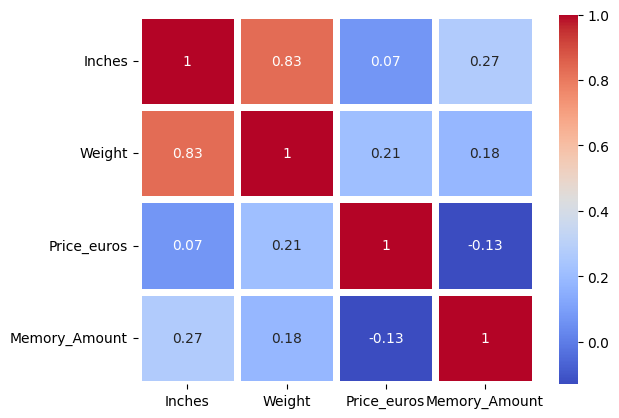

In [24]:
sns.heatmap(corr_matrix, annot = True, linewidths = 5, cmap = 'coolwarm');